## Bulldozer Price Prediciton Project

## Data Dictionary
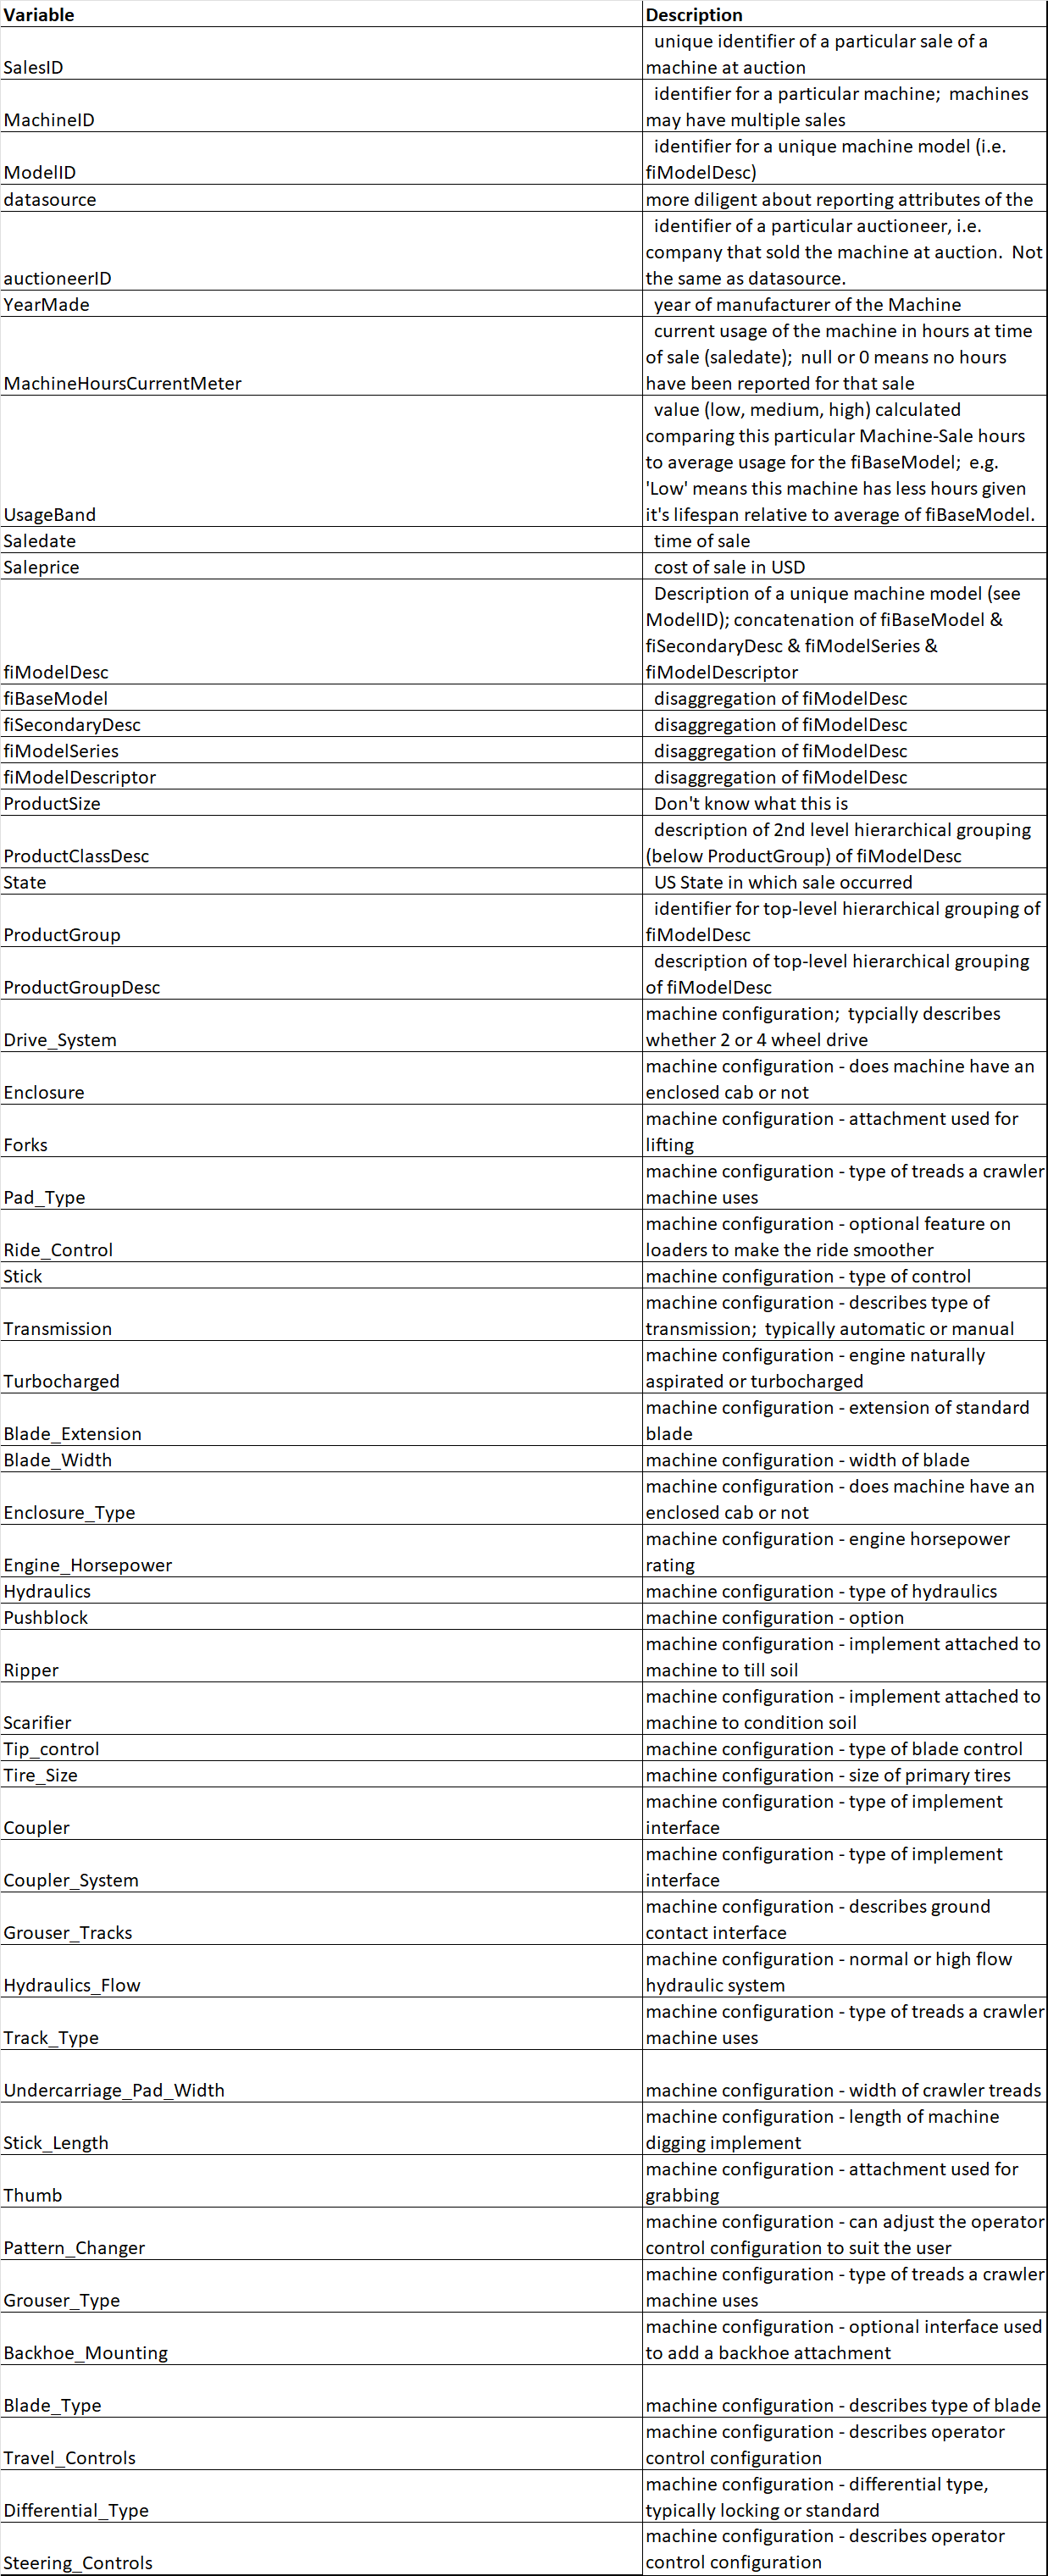

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

## Data Analysis

In [4]:
bulldozer_df=pd.read_csv("TrainAndValid.csv", low_memory=False,parse_dates=["saledate"])

In [5]:
bulldozer_df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [6]:
bulldozer_df.shape

(412698, 53)

In [7]:
bulldozer_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [22]:
bulldozer_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


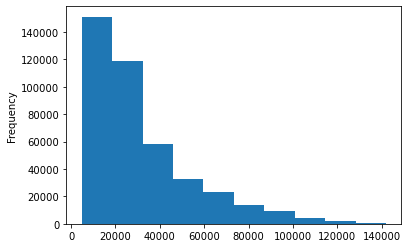

In [23]:
bulldozer_df.SalePrice.plot.hist();

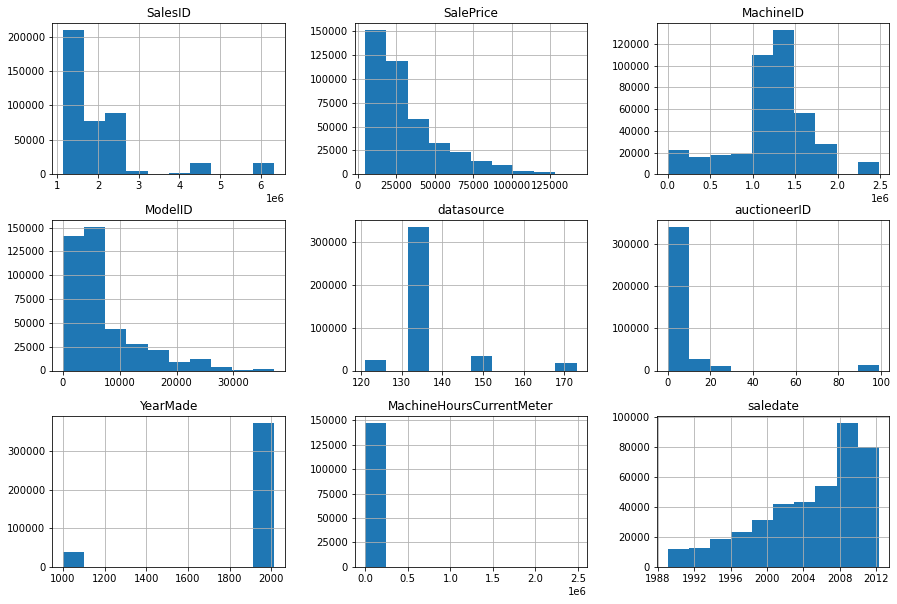

In [24]:
bulldozer_df.hist(figsize=(15,10));

In [25]:
bulldozer_df[bulldozer_df["YearMade"]<1200]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
21,1139333,34500.0,999192,3350,121,3.0,1000,16328.0,Medium,2006-10-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1139369,14000.0,1050658,1918,121,3.0,1000,0.0,NaN,2010-01-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
35,1139382,10000.0,1068548,112,121,3.0,1000,3981.0,Low,2011-06-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
36,1139390,8250.0,1011114,7110,121,3.0,1000,0.0,NaN,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412640,6328458,10000.0,1790438,10920,149,8.0,1000,NaN,NaN,2012-01-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
412648,6330898,13750.0,1840457,20244,149,12.0,1000,NaN,NaN,2012-02-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
412651,6331404,11000.0,1902299,6054,149,1.0,1000,NaN,NaN,2012-02-13,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412654,6331905,17250.0,1799806,11119,149,4.0,1000,NaN,NaN,2012-02-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remark: Possible Data Error or notation of 1000 when year not specified

In [26]:
bulldozer_df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


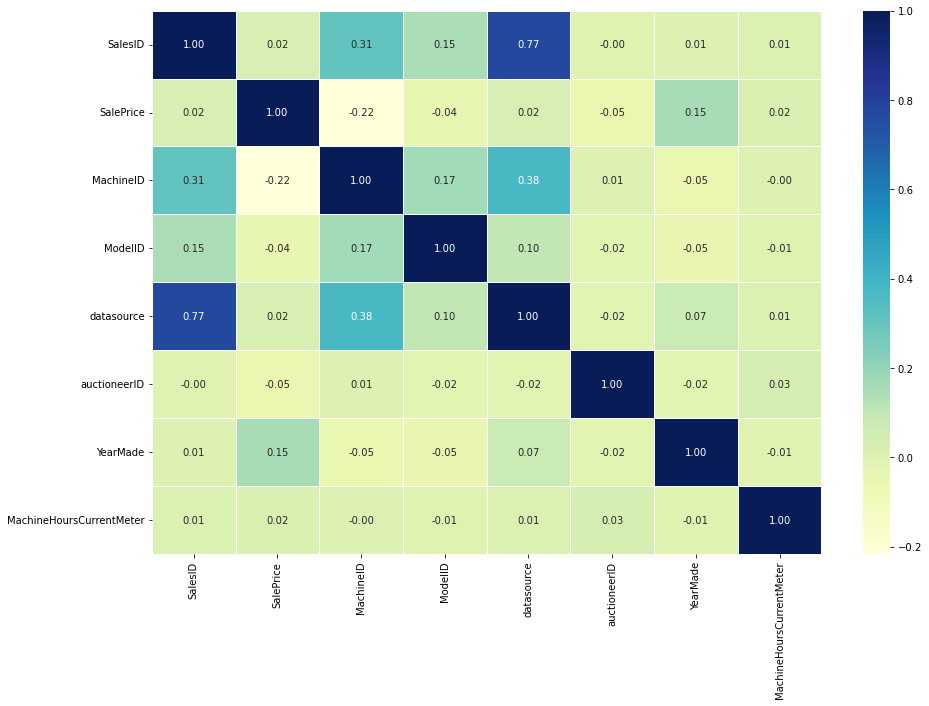

In [27]:
corr_matrix=bulldozer_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

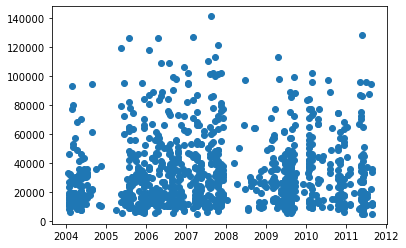

In [30]:
fig,ax=plt.subplots()
ax.scatter(bulldozer_df["saledate"][:1000],bulldozer_df["SalePrice"][:1000]);

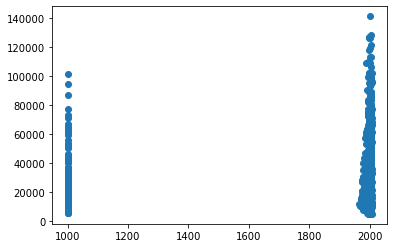

In [36]:
fig,ax=plt.subplots()
ax.scatter(bulldozer_df["YearMade"][:1000],bulldozer_df["SalePrice"][:1000]);

In [49]:
made_years=list(set(bulldozer_df["YearMade"]))
made_years.sort()
print(made_years, "\nLen=",len(made_years))

[1000, 1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] 
Len= 73


In [8]:
bulldozer_copy_df=bulldozer_df

In [9]:
bulldozer_copy_df["SaleMonth"]=bulldozer_copy_df.saledate.dt.month
bulldozer_copy_df["SaleQuarter"]=bulldozer_copy_df.saledate.dt.quarter
bulldozer_copy_df["SaleYear"]=bulldozer_copy_df.saledate.dt.year

In [53]:
bulldozer_copy_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleQuarter,SaleYear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11,4,2006
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,3,1,2004
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2004
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2011
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012


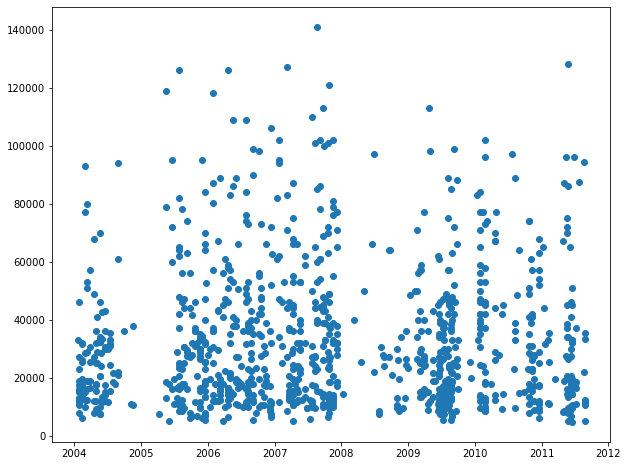

In [59]:
bulldozer_copy_df.sample(frac=1)
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(bulldozer_df["saledate"][:1000],bulldozer_df["SalePrice"][:1000]);

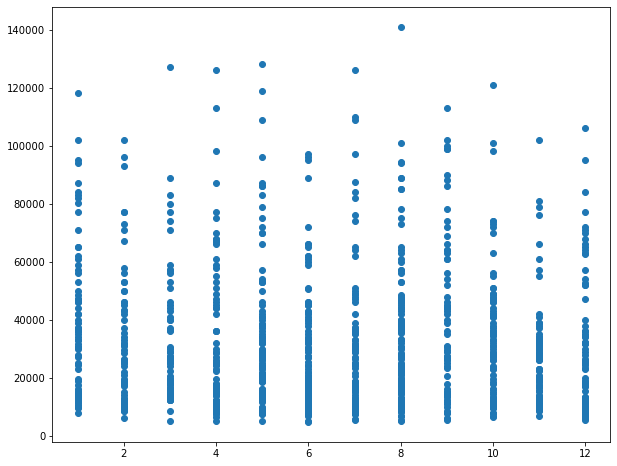

In [60]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(bulldozer_df["SaleMonth"][:1000],bulldozer_df["SalePrice"][:1000]);

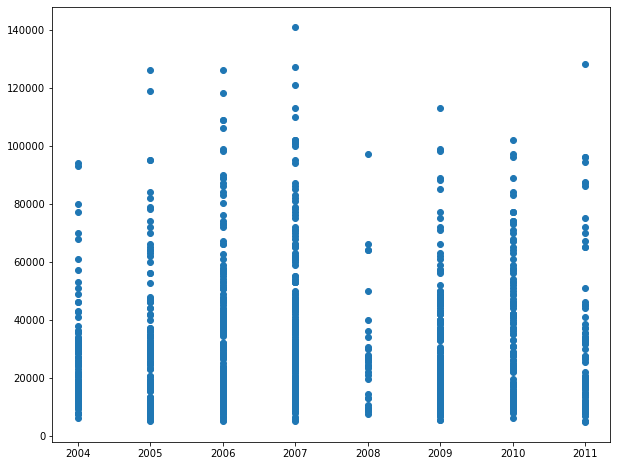

In [61]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(bulldozer_df["SaleYear"][:1000],bulldozer_df["SalePrice"][:1000]);

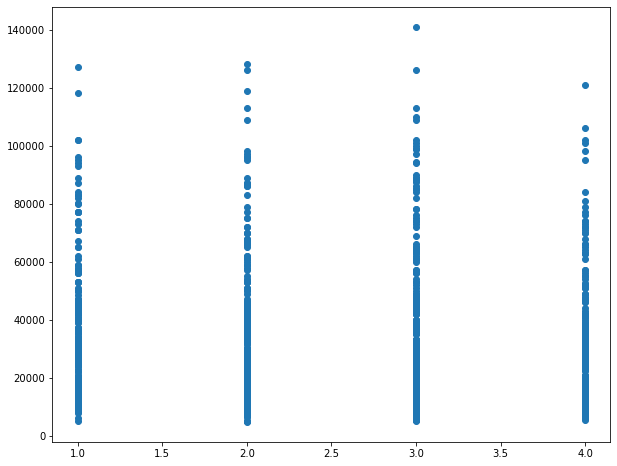

In [62]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(bulldozer_df["SaleQuarter"][:1000],bulldozer_df["SalePrice"][:1000]);

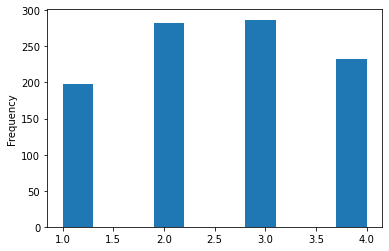

In [64]:
bulldozer_copy_df["SaleQuarter"][:1000].plot.hist();

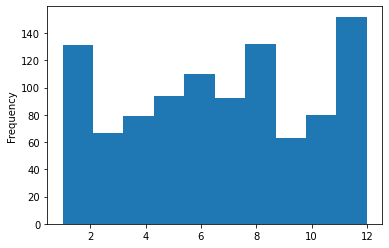

In [65]:
bulldozer_copy_df["SaleMonth"][:1000].plot.hist();

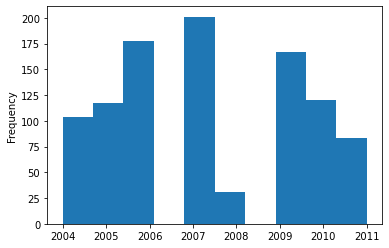

In [66]:
bulldozer_copy_df["SaleYear"][:1000].plot.hist();

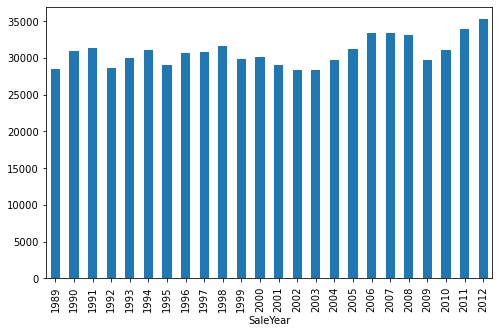

In [82]:
(bulldozer_copy_df.groupby("SaleYear")["SalePrice"].mean()).plot.bar(figsize=(8,5));

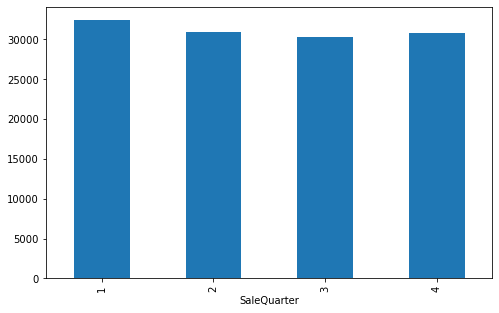

In [83]:
(bulldozer_copy_df.groupby("SaleQuarter")["SalePrice"].mean()).plot.bar(figsize=(8,5));

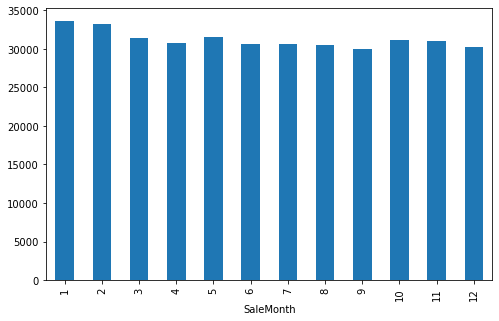

In [84]:
(bulldozer_copy_df.groupby("SaleMonth")["SalePrice"].mean()).plot.bar(figsize=(8,5));

In [10]:
bulldozer_copy_df["SaleDay"]=bulldozer_copy_df.saledate.dt.day

In [11]:
bulldozer_copy_df.drop("saledate",axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleQuarter,SaleYear,SaleDay
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,NaN,Standard,Conventional,11,4,2006,16
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,NaN,Standard,Conventional,3,1,2004,26
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2004,26
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2011,19
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,7,3,2009,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,30NX,...,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012,7
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,30NX2,...,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012,28
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,30NX,...,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012,28
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,30NX,...,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012,7


## Converting Data into Numbers and Filling Nans

In [13]:
for label, content in bulldozer_copy_df.items():
    if pd.api.types.is_string_dtype(content):
        bulldozer_copy_df[label]=content.astype("category").cat.as_ordered()

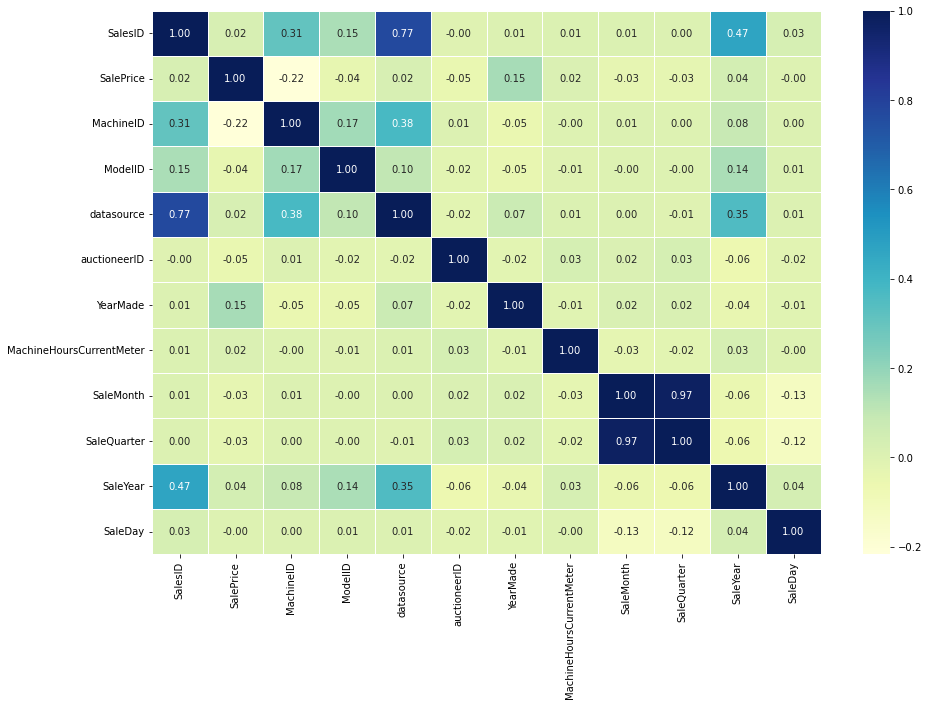

In [93]:
corr_matrix=bulldozer_copy_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [14]:
bulldozer_copy_df.drop("SaleDay",axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleQuarter,SaleYear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11,4,2006
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,3,1,2004
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2004
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2011
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,1,2012
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,1,2012


In [95]:
bulldozer_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [15]:
nan_series=bulldozer_copy_df.isna().sum()
bull_copy=bulldozer_copy_df
for i in nan_series.keys():
    if nan_series.get(i)>300000:
        bull_copy.drop(i,axis=1,inplace=True)

In [16]:
bull_copy.drop("saledate",axis=1,inplace=True)

In [17]:
bull_copy.drop("SaleDay",axis=1,inplace=True)

In [118]:
bull_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Enclosure                      334
Forks                       214983
Ride_Control                259970
Transmission                224691
Hydraulics                   82565
Coupler                     192019
SaleMonth                        0
SaleQuarter                      0
SaleYear                         0
dtype: int64

In [121]:
bull_copy.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Enclosure                   category
Forks                       category
Ride_Control                category
Transmission                category
Hydraulics                  category
Coupler                     category
SaleMonth                      int64
SaleQuarter                    int64
SaleYear                       int64
dtype: object

In [18]:
nan_types=bull_copy.dtypes
for i in nan_types.keys():
    if nan_types.get(i)=="int64" or nan_types.get(i)=="float64":
        bull_copy[i].fillna(value=bull_copy[i].median(),inplace=True)

In [19]:
nan_types=bull_copy.dtypes
temp_bull=bull_copy
for i in nan_types.keys():
    if nan_types.get(i)!="int64" and nan_types.get(i)!="float64":
        temp_bull[i]=temp_bull[i].astype(str)

In [20]:
for i in nan_types.keys():
    if nan_types.get(i)!="int64" and nan_types.get(i)!="float64":
        temp_bull[i].fillna(value="missing",inplace=True)
temp_bull.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Enclosure                   0
Forks                       0
Ride_Control                0
Transmission                0
Hydraulics                  0
Coupler                     0
SaleMonth                   0
SaleQuarter                 0
SaleYear                    0
dtype: int64

In [21]:
for label, content in temp_bull.items():
    if pd.api.types.is_string_dtype(content):
        bulldozer_copy_df[label]=content.astype("category").cat.as_ordered()
temp_bull.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Enclosure                   category
Forks                       category
Ride_Control                category
Transmission                category
Hydraulics                  category
Coupler                     category
SaleMonth                      int64
SaleQuarter                    int64
SaleYear                       int64
dtype: object

In [22]:
bull_copy=temp_bull

In [138]:
bull_copy.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Enclosure                   0
Forks                       0
Ride_Control                0
Transmission                0
Hydraulics                  0
Coupler                     0
SaleMonth                   0
SaleQuarter                 0
SaleYear                    0
dtype: int64

In [23]:
types=bull_copy.dtypes
for i in types.keys():
    if types.get(i)!="int64" and types.get(i)!="float64":
        bull_copy[i] = bull_copy[i].cat.codes

In [162]:
bull_copy.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc               int16
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Enclosure                      int8
Forks                          int8
Ride_Control                   int8
Transmission                   int8
Hydraulics                     int8
Coupler                        int8
SaleMonth                     int64
SaleQuarter                   int64
SaleYear                      int64
dtype: object

## Modeling

In [40]:
model=RandomForestRegressor()
X=bull_copy.drop("SalePrice",axis=1)
y=bull_copy["SalePrice"]

In [41]:
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X.dtypes

SalesID                       int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc               int16
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Enclosure                      int8
Forks                          int8
Ride_Control                   int8
Transmission                   int8
Hydraulics                     int8
Coupler                        int8
SaleMonth                     int64
SaleQuarter                   int64
SaleYear                      int64
dtype: object

In [42]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9035191178734248

In [43]:
def Root_Mean_Squared_Log_Error(y_test,y_preds):
    """
    Returns Root_Mean_Squared_Log_Error based on sklearn's mean_squared_log_error function
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [44]:
y_preds=model.predict(X_test)

In [45]:
print(Root_Mean_Squared_Log_Error(y_test,y_preds))

0.2155543991288611


In [61]:
features=model.feature_importances_
keys=X_test.columns
features_dict={}
features_dict = {keys[i]:features[i] for i in range(len(keys))}

{'SalesID': 0.05529346839375655, 'MachineID': 0.022819564857362046, 'ModelID': 0.07996516264371605, 'datasource': 0.0008358780880151287, 'auctioneerID': 0.0067139223732178566, 'YearMade': 0.2425135977785885, 'MachineHoursCurrentMeter': 0.005143331070436508, 'fiModelDesc': 0.02465014030551633, 'fiBaseModel': 0.08633042424635265, 'fiSecondaryDesc': 0.020951880188770578, 'ProductSize': 0.2399961689203044, 'fiProductClassDesc': 0.07756398801673571, 'state': 0.013221042573594726, 'ProductGroup': 0.0032732179979453623, 'ProductGroupDesc': 0.004169344118950974, 'Enclosure': 0.008776827800537661, 'Forks': 0.001500233762558566, 'Ride_Control': 0.0012233615158969496, 'Transmission': 0.009555233288275698, 'Hydraulics': 0.0021775491418838445, 'Coupler': 0.0019304428342605097, 'SaleMonth': 0.012141249884587086, 'SaleQuarter': 0.0033715288704199275, 'SaleYear': 0.0758824413283163}


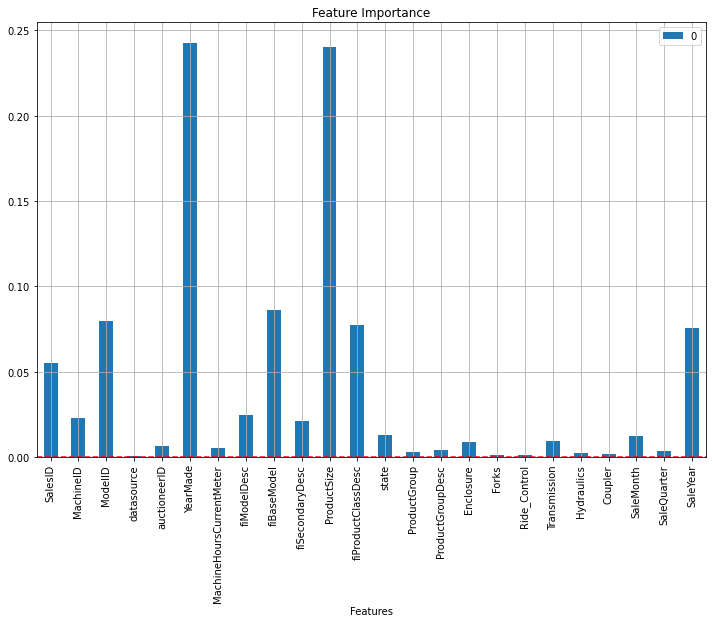

In [63]:
results_df=pd.DataFrame.from_dict(features_dict, orient='index')
ax=results_df.plot.bar(figsize=(12,8));
ax.axhline(y=0,linestyle="--",color='r');
ax.grid();
ax.set(title="Feature Importance",xlabel="Features");